# Machine Learning esencial: clustering

## Lección 1: Preparar datos para ML

In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("base_datos_2008.csv",nrows=100000)

In [3]:
df=df[["ArrDelay","DepDelay","Distance","AirTime"]].dropna()

Es bueno escalar los datos: estandarizacion

In [14]:
X_scaled=preprocessing.scale(df)
X_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [16]:
X_scaled.mean(axis=0)

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [17]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [20]:
df.head()

,ArrDelay,DepDelay,Distance,AirTime
0,-14.0,8.0,810,116.0
1,2.0,19.0,810,113.0
2,14.0,8.0,515,76.0
3,-6.0,-4.0,515,78.0
4,34.0,34.0,515,77.0


In [21]:
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [24]:
X_scaled[2]

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

In [25]:
min_max_scaler=preprocessing.MinMaxScaler([0,10])
X_train_mixmax=min_max_scaler.fit_transform(df)
X_train_mixmax

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

In [29]:
X_train_mixmax.max()

10.0

Transformar variables categoricas en variables dummys

In [32]:
df = pd.read_csv("base_datos_2008.csv",nrows=100)
pd.get_dummies(df["Origin"])

,IAD,IND,ISP,JAN,JAX,LAS
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
95,0,0,0,0,0,1
96,0,0,0,0,0,1
97,0,0,0,0,0,1
98,0,0,0,0,0,1


## Lección 2: clustering, K-means

Separa muestras en n grupos de igual varianza

In [35]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv",nrows=1e5)
newdf=df[["AirTime","DepDelay"]].dropna()

Entrenamos el modelo

In [36]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(newdf)
kmeans.labels_

array([3, 3, 1, ..., 0, 3, 3], dtype=int32)

In [30]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 3944, 60402,  8274, 26078]))

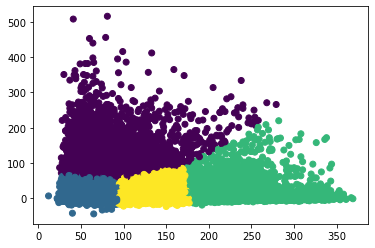

In [37]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=kmeans.labels_)
plt.show()

Centroides

In [38]:
kmeans.cluster_centers_

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

Usamos el modelo para clasificar el resto de los puntos

In [42]:
alldf=pd.read_csv("base_datos_2008.csv",nrows=1e6)[["AirTime","DepDelay"]].dropna()

In [47]:
kmeans_predicted=kmeans.predict(alldf)
kmeans_predicted[0:50]

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0], dtype=int32)

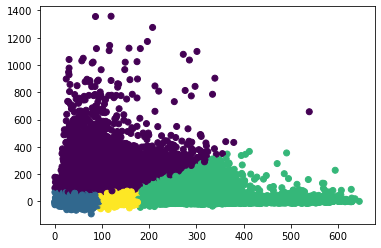

In [48]:
plt.scatter(alldf["AirTime"],alldf["DepDelay"],c=kmeans_predicted)
plt.show()

Mas variables

In [49]:
newdf=df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [50]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(newdf)
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

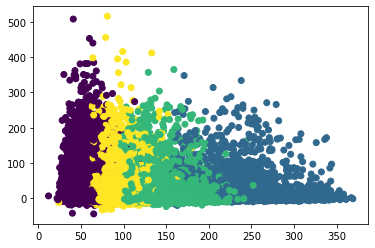

In [51]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=kmeans.labels_)
plt.show()

Mas agrupaciones

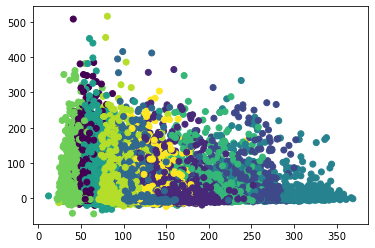

In [52]:
kmeans=KMeans(n_clusters=10,random_state=0).fit(newdf)
kmeans.labels_
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=kmeans.labels_)
plt.show()

## Lección 3: hierarchical clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("base_datos_2008.csv",nrows=1e4)
newdf=df[["AirTime","DepDelay"]].dropna()

In [25]:
clstr=AgglomerativeClustering(n_clusters=5)
clstr.fit(newdf)

#Distancias:
#euclidean / l1/ l2/ manhattan / cosine / precomputed
#"affinity"="l2","linkage"="complete"

AgglomerativeClustering(n_clusters=5)

In [26]:
clstr.fit_predict(newdf)

array([0, 0, 1, ..., 3, 3, 1])

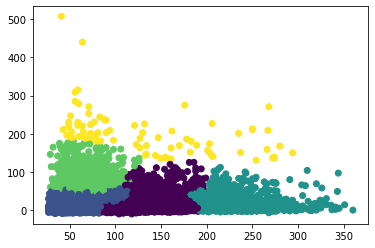

In [27]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=clstr.labels_)
plt.show()

In [28]:
newdf=df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [30]:
clstr=AgglomerativeClustering(n_clusters=20)
clstr.fit(newdf)

AgglomerativeClustering(n_clusters=20)

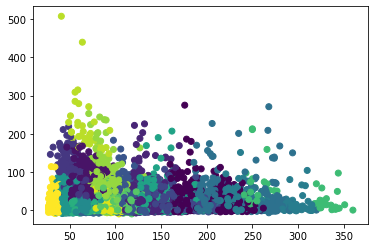

In [31]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=clstr.labels_)
plt.show()

Predicción y clasificación:

In [39]:
df=pd.read_csv("base_datos_2008.csv",nrows=2e4)[["AirTime","DepDelay"]].dropna()
fit=clstr.fit_predict(df)

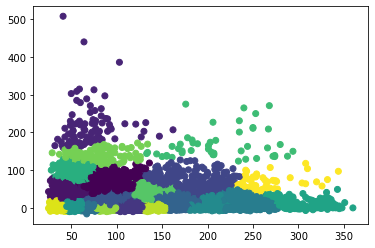

In [40]:
plt.scatter(df["AirTime"],df["DepDelay"],c=fit)
plt.show()

# Machine Learning: Modelización

## Lección 1: regresión líneal

In [37]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #Funciones para evaluar la precisión del modelo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("base_datos_2008.csv")

In [38]:
df=df.dropna(subset=["ArrDelay"])
df=df.sample(frac=1).head(100000)
Y=df["ArrDelay"]
X=df[["DepDelay"]]

In [39]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

Coeficientes:  [1.01624286]
R cuadrado:  0.8686907179717213


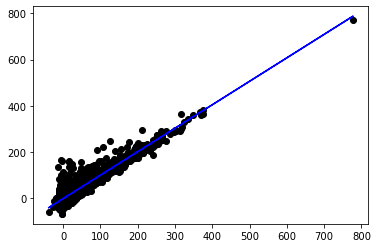

In [7]:
plt.scatter(X[1:10000],Y[1:10000],color="black")
plt.plot(np.array(X)[1:10000],Y_pred[1:10000],color="blue")
plt.show()

Variables regresoras categoricas

In [10]:
X= df[["AirTime","Distance","TaxiIn","TaxiOut"]]

df["Month"]=df["Month"].apply(str)
df["DayofMonth"]=df["DayofMonth"].apply(str)
df["DayOfWeek"]=df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[["Month","DayofMonth","DayOfWeek","Origin","Dest"]])
X = dummies.add(X,fill_value=0)

In [11]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=648)

In [13]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

#print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.17755962332512187


In [14]:
X=X.add(df[["DepDelay"]],fill_value=0)

In [15]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)

#print("Coeficientes: ",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.9709775010639998


## Lección 2: regresión logística

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
df=pd.read_csv("base_datos_2008.csv")

In [ ]:
df = df.dropna(subset = ["ArrDelay"]) # Se borran datos faltantes en la variable respuesta
df = df.sample(frac=1).head(100000)
Y=df["ArrDelay"]<30 # Da un True of False dependiendo.
X=df[["DepDelay"]]

In [ ]:
Y

In [8]:
logreg=LogisticRegression()
logreg.fit(X,Y)
Y_pred=logreg.predict(X)

In [13]:
np.round(logreg.predict_proba(X),3)# Probabilidades 

array([[0.179, 0.821],
       [0.013, 0.987],
       [0.131, 0.869],
       ...,
       [0.007, 0.993],
       [0.026, 0.974],
       [0.007, 0.993]])

In [15]:
np.mean(Y_pred==Y)

0.95611

In [12]:
np.mean(Y)

0.86505

In [16]:
confusion_matrix=confusion_matrix(Y,Y_pred)
print(confusion_matrix)

[[10171  3324]
 [ 1065 85440]]


## Lección 2: Naive Bayes

Aproximación probabilistica a la modelización de datos: Clasificadores Naive Bayes (Naive por que se asume independencia entre variables que puede que no lo sean)

In [2]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import numpy as np
import pandas as pd

df=pd.read_csv("base_datos_2008.csv")
df = df.sample(frac=1).head(100000)

In [3]:
df=df.dropna(subset=["ArrDelay"]) # Eliminamos los datos faltantes

In [4]:
Y=df["ArrDelay"]>0 # Variable respuesta, vuelos que se han retrasado

Construcción de variables dummies, se pasan a string luego se usa get_dummies

In [5]:
df["Month"]=df["Month"].apply(str)
df["DayofMonth"]=df["DayofMonth"].apply(str)
df["DayOfWeek"]=df["DayOfWeek"].apply(str)
df["TailNum"] = df["TailNum"].apply(str)

X=pd.get_dummies(data=df[["Month","DayofMonth","TailNum","DayOfWeek","Origin","Dest","UniqueCarrier"]])

In [6]:
X.head()

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
5914550,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5255773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363433,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252158,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3826778,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [7]:
clf=BernoulliNB()
clf.fit(X,Y)
Y_pred=clf.predict(X)

In [8]:
np.mean(Y==Y_pred)

0.6267390393245219

In [9]:
1-np.mean(Y)

0.5644249542559825

In [11]:
X = df[["AirTime","Distance","TaxiIn","TaxiOut"]] # DepDelay
clf=GaussianNB()
clf.fit(X,Y)
Y_pred=clf.predict(X)

In [12]:
np.mean(Y==Y_pred)

0.6538787860202193

In [13]:
X = df[["AirTime","Distance","TaxiIn","TaxiOut","DepDelay"]]
clf=GaussianNB()
clf.fit(X,Y)
Y_pred=clf.predict(X)

In [14]:
np.mean(Y==Y_pred)

0.8050640416245004